In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:

df = pd.read_csv('Data_Fraude.csv')
df.head(10)


Unnamed: 0  Unnamed: 0.1     id_x  police_id  vehicule_id  assure_id  \
0           0             0    32696      32700        29293      26960   
1           1             1    33346      33350        28891      26553   
2           2             2    33482      33486        29087      26754   
3           3             3    33496      33500        30651      28321   
4           4             4    33732      33736        30930      28600   
5           5             5  5296392      37127        30930      31087   
6           6             6    34117      34121        29930      27596   
7           7             7    34118      34122        29932      27598   
8           8             8    34132      34136        29955      27621   
9           9             9    34718      34722        30788      28458   

   souscripteur_id  classeBonusMalus  coefBonusMalus  \
0            26960                 3             100   
1            26553                 1              80   
2            26754                 2              90   
3            28321                 1              80   
4            28600                 1              80   
5            31092                 2              90   
6            27596                 4             120   
7            27598                 5             150   
8            27621                 2              90   
9            28458                 5             150   

             DATE_AFFECTATION  bonus                date_Calcule  \
0  2017-05-11 00:00:00.000000      0  2016-05-11 00:00:00.000000   
1  2017-08-18 00:00:00.000000      0  2016-08-18 00:00:00.000000   
2  2016-09-20 00:00:00.000000      0  2016-09-20 00:00:00.000000   
3  2017-11-11 00:00:00.000000      0  2016-11-11 00:00:00.000000   
4  2016-11-14 00:00:00.000000      0  2016-11-14 00:00:00.000000   
5  2018-06-10 00:00:00.000000      0  2019-06-01 00:00:00.000000   
6  2016-09-13 00:00:00.000000      0  2016-09-13 00:00:00.000000   
7  2017-09-16 00:00:00.000000      0  2016-09-16 00:00:00.000000   
8  2016-10-21 00:00:00.000000      0  2016-10-21 00:00:00.000000   
9  2017-08-19 00:00:00.000000      0  2016-08-19 00:00:00.000000   

  dateChangementVehicule         numChassis  puissanceFiscal  \
0                    NaN  VF1LB270F37539762              5.0   
1                    NaN  VF37BWJZT1P001378              6.0   
2                    NaN  VF7FC8HZCAA588883              6.0   
3                    NaN  WVWZZZ9NZ9Y071629              4.0   
4                    NaN  WVWZZZ6RZCY078450              4.0   
5                    NaN  WVWZZZ6RZCY078450              4.0   
6                    NaN  VF1BR1G0H40722171              4.0   
7                    NaN  9BD17159375520668              5.0   
8                    NaN  WVWZZZ9NZ8Y169022              4.0   
9                    NaN  KMJWWH7HP5U670054             10.0   

  numImmatriculation typeImmatriculation  energie dateInsertion  \
0          1554TU127                  TU  ESSENCE    2017-10-05   
1           1355TU96                  TU   GASOIL    2017-10-05   
2          6149TU159                  TU   GASOIL    2017-10-05   
3          6011TU135                  TU   GASOIL    2017-10-05   
4          9654TU154                  TU   GASOIL    2017-10-05   
5          9654TU154                  TU   GASOIL    2017-10-05   
6          7072TU153                  TU   GASOIL    2017-10-05   
7          7128TU143                  TU  ESSENCE    2017-10-05   
8           156TU133                  TU   GASOIL    2017-10-05   
9          9787TU118                  TU   GASOIL    2017-10-05   

                    dateAjout Marque_vehicule Usage  codeCompagnie  \
0  2018-02-08 01:01:10.000000         RENAULT  Taxi              1   
1  2018-02-08 01:01:03.000000         PEUGEOT  Taxi              1   
2  2018-02-08 01:01:06.000000         CITROEN  Taxi              1   
3  2018-02-08 03:20:10.000000      VOLKSWAGEN  Taxi              1   
4  2018-02-08 03:2

In [0]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.drop(columns=['Unnamed: 0.1'],inplace=True)


In [0]:
df = df[df["Fraude"]==False]

In [0]:
df

In [0]:
df.to_csv("data_NonFraude.csv")

#Data analysis

In [0]:
df.columns

Index(['id_x', 'police_id', 'vehicule_id', 'assure_id', 'souscripteur_id',
       'classeBonusMalus', 'coefBonusMalus', 'DATE_AFFECTATION', 'bonus',
       'date_Calcule', 'dateChangementVehicule', 'numChassis',
       'puissanceFiscal', 'numImmatriculation', 'typeImmatriculation',
       'energie', 'dateInsertion', 'dateAjout', 'Marque_vehicule', 'Usage',
       'codeCompagnie', 'codeAgence', 'typeIntermediaire', 'numPolice',
       'naturePolice', 'typePolice', 'dateEffetPolice', 'dateEcheancePolice',
       'dateExpirationPolice', 'DATE_RESILIATION', 'Date_Suspenssion',
       'Fraude', 'Nombre_Sinistre'],
      dtype='object')

In [0]:
df.shape

(93142, 33)

In [0]:
df.nunique()

id_x                      93142
police_id                 93142
vehicule_id               92480
assure_id                 86257
souscripteur_id           86004
classeBonusMalus             11
coefBonusMalus               13
DATE_AFFECTATION           1870
bonus                         2
date_Calcule               3429
dateChangementVehicule      664
numChassis                92280
puissanceFiscal              57
numImmatriculation        92480
typeImmatriculation          13
energie                       4
dateInsertion               571
dateAjout                 74746
Marque_vehicule             223
Usage                        17
codeCompagnie                12
codeAgence                  573
typeIntermediaire             2
numPolice                 93142
naturePolice                  2
typePolice                    2
dateEffetPolice            7602
dateEcheancePolice          365
dateExpirationPolice        694
DATE_RESILIATION            789
Date_Suspenssion            349
Fraude  

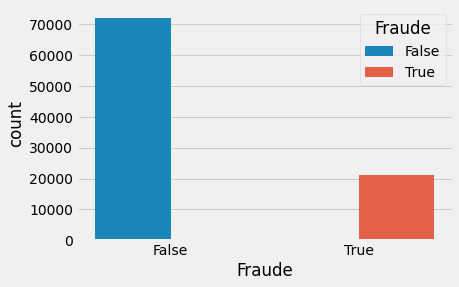

In [0]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Fraude', data=df, hue='Fraude')

In [0]:
df['Fraude'].value_counts()

False    72039
True     21103
Name: Fraude, dtype: int64

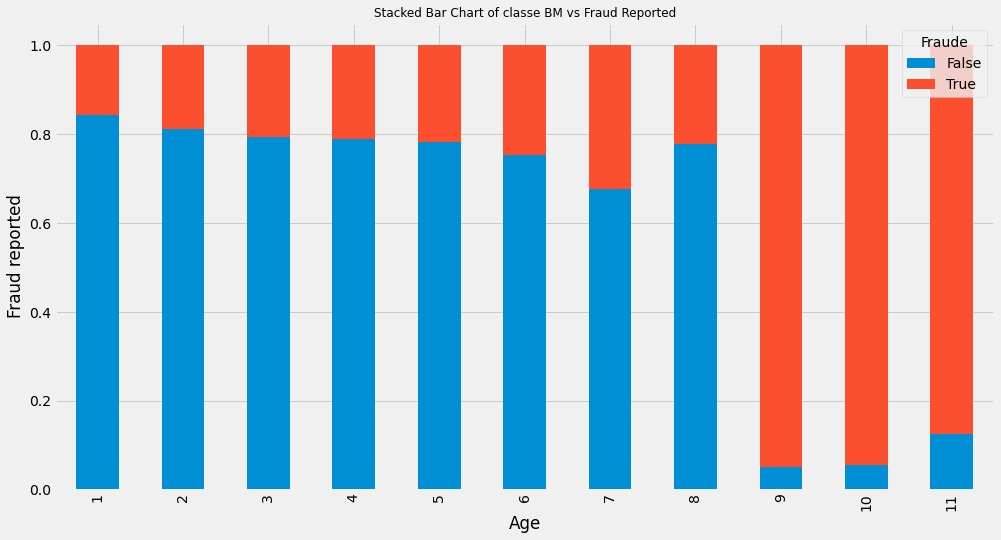

In [0]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.classeBonusMalus, df.Fraude)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of classe BM vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()

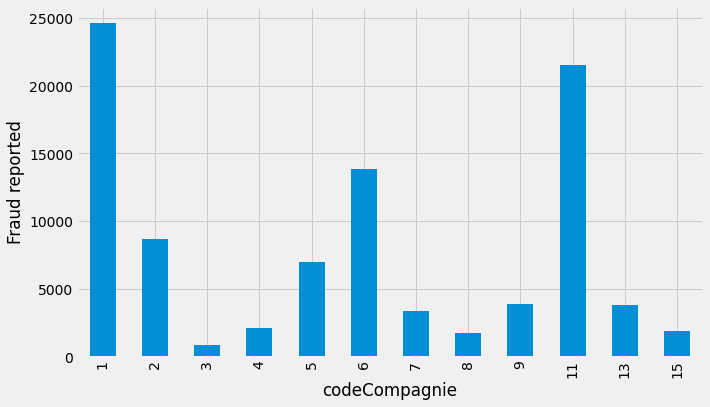

In [0]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('codeCompagnie').Fraude.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

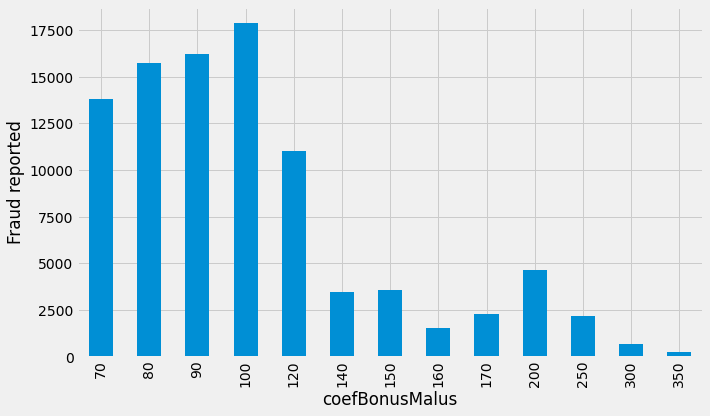

In [0]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('coefBonusMalus').Fraude.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

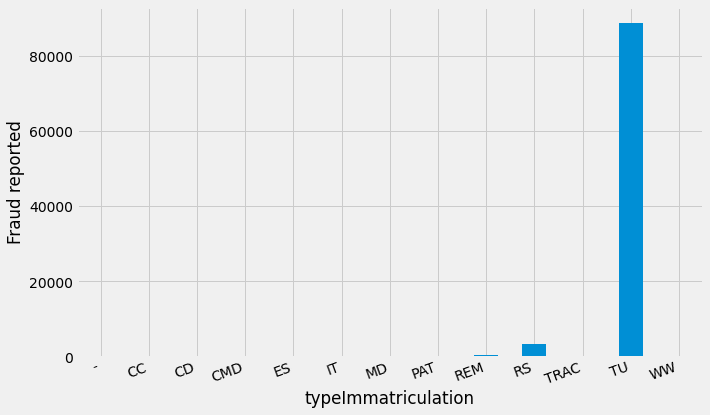

In [0]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('typeImmatriculation').Fraude.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

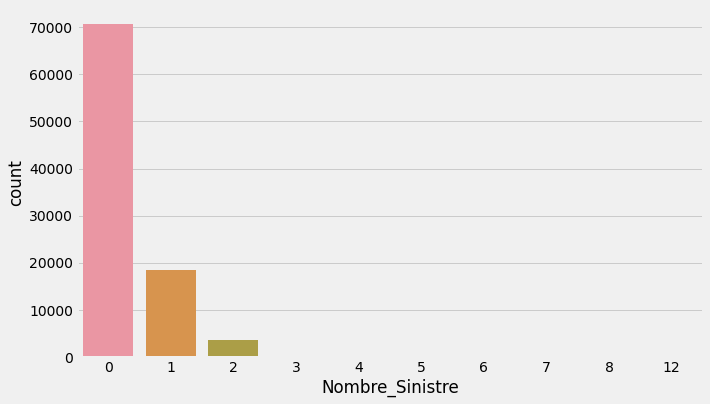

In [0]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='Nombre_Sinistre', data=df)

#EAD

In [0]:

df['Fraude'].replace(to_replace='True', value=1, inplace=True)
df['Fraude'].replace(to_replace='False',  value=0, inplace=True)



In [0]:
df.head()

id_x  police_id  vehicule_id  assure_id  souscripteur_id  \
0  32696      32700        29293      26960            26960   
1  33346      33350        28891      26553            26553   
2  33482      33486        29087      26754            26754   
3  33496      33500        30651      28321            28321   
4  33732      33736        30930      28600            28600   

   classeBonusMalus  coefBonusMalus            DATE_AFFECTATION  bonus  \
0                 3             100  2017-05-11 00:00:00.000000      0   
1                 1              80  2017-08-18 00:00:00.000000      0   
2                 2              90  2016-09-20 00:00:00.000000      0   
3                 1              80  2017-11-11 00:00:00.000000      0   
4                 1              80  2016-11-14 00:00:00.000000      0   

                 date_Calcule dateChangementVehicule         numChassis  \
0  2016-05-11 00:00:00.000000                    NaN  VF1LB270F37539762   
1  2016-08-18 00:00:00.000000                    NaN  VF37BWJZT1P001378   
2  2016-09-20 00:00:00.000000                    NaN  VF7FC8HZCAA588883   
3  2016-11-11 00:00:00.000000                    NaN  WVWZZZ9NZ9Y071629   
4  2016-11-14 00:00:00.000000                    NaN  WVWZZZ6RZCY078450   

   puissanceFiscal numImmatriculation typeImmatriculation  energie  \
0              5.0          1554TU127                  TU  ESSENCE   
1              6.0           1355TU96                  TU   GASOIL   
2              6.0          6149TU159                  TU   GASOIL   
3              4.0          6011TU135                  TU   GASOIL   
4              4.0          9654TU154                  TU   GASOIL   

  dateInsertion                   dateAjout Marque_vehicule Usage  \
0    2017-10-05  2018-02-08 01:01:10.000000         RENAULT  Taxi   
1    2017-10-05  2018-02-08 01:01:03.000000         PEUGEOT  Taxi   
2    2017-10-05  2018-02-08 01:01:06.000000         CITROEN  Taxi   
3    2017-10-05  2018-02-08 03:20:10.000000      VOLKSWAGEN  Taxi   
4    2017-10-05  2018-02-08 03:20:16.000000      VOLKSWAGEN  Taxi   

   codeCompagnie  codeAgence  typeIntermediaire        numPolice naturePolice  \
0              1         702                  0  20115.0021718/3            R   
1              1         640                  1  20065.0016148/1            R   
2              1         681                  0  20085.0370414/3            R   
3              1         725                  0  20085.0052688/7            R   
4              1         628                  0  20115.0058429/4            R   

  typePolice dateEffetPolice  dateEcheancePolice dateExpirationPolice  \
0          I      2011-05-11               511.0                  NaN   
1          I      2006-08-18               818.0                  NaN   
2          I      2008-09-20               920.0                  NaN   
3          I      2008-11-11              1111.0                  NaN   
4          I      2011-11-14              1114.0                  NaN   

             DATE_RESILIATION Date_Suspenssion  Fraude  Nombre_Sinistre  
0  2017-03-07 00:00:00.000000              NaN   False                0  
1  2017-06-13 00:00:00.000000              NaN   False                0  
2  2016-12-07 00:00:00.000000              NaN   False                0  
3  2017-10-06 00:00:00.000000              NaN   False                0  
4  2017-01-10 00:00:00.000000              NaN   False                0

In [0]:
df['Fraude'].unique()

array([False,  True])

In [0]:
df['Fraude'].replace(to_replace='True', value=1, inplace=True)

In [0]:
df.isna().sum()

id_x                          0
police_id                     0
vehicule_id                   0
assure_id                     0
souscripteur_id               0
classeBonusMalus              0
coefBonusMalus                0
DATE_AFFECTATION              0
bonus                         0
date_Calcule                  0
dateChangementVehicule    89965
numChassis                    0
puissanceFiscal               0
numImmatriculation            0
typeImmatriculation           0
energie                       0
dateInsertion                 0
dateAjout                     0
Marque_vehicule               0
Usage                         0
codeCompagnie                 0
codeAgence                    0
typeIntermediaire             0
numPolice                     0
naturePolice                  0
typePolice                    0
dateEffetPolice               0
dateEcheancePolice         2922
dateExpirationPolice      90220
DATE_RESILIATION          81105
Date_Suspenssion          91885
Fraude  

In [0]:
df.drop(columns=['dateEcheancePolice','dateChangementVehicule','dateExpirationPolice','DATE_RESILIATION','Date_Suspenssion'],inplace=True)

In [0]:
df.isna().sum()

id_x                   0
police_id              0
vehicule_id            0
assure_id              0
souscripteur_id        0
classeBonusMalus       0
coefBonusMalus         0
DATE_AFFECTATION       0
bonus                  0
date_Calcule           0
numChassis             0
puissanceFiscal        0
numImmatriculation     0
typeImmatriculation    0
energie                0
dateInsertion          0
dateAjout              0
Marque_vehicule        0
Usage                  0
codeCompagnie          0
codeAgence             0
typeIntermediaire      0
numPolice              0
naturePolice           0
typePolice             0
dateEffetPolice        0
Fraude                 0
Nombre_Sinistre        0
dtype: int64

In [0]:
df.head()

id_x  police_id  vehicule_id  assure_id  souscripteur_id  \
0  32696      32700        29293      26960            26960   
1  33346      33350        28891      26553            26553   
2  33482      33486        29087      26754            26754   
3  33496      33500        30651      28321            28321   
4  33732      33736        30930      28600            28600   

   classeBonusMalus  coefBonusMalus            DATE_AFFECTATION  bonus  \
0                 3             100  2017-05-11 00:00:00.000000      0   
1                 1              80  2017-08-18 00:00:00.000000      0   
2                 2              90  2016-09-20 00:00:00.000000      0   
3                 1              80  2017-11-11 00:00:00.000000      0   
4                 1              80  2016-11-14 00:00:00.000000      0   

                 date_Calcule         numChassis  puissanceFiscal  \
0  2016-05-11 00:00:00.000000  VF1LB270F37539762              5.0   
1  2016-08-18 00:00:00.000000  VF37BWJZT1P001378              6.0   
2  2016-09-20 00:00:00.000000  VF7FC8HZCAA588883              6.0   
3  2016-11-11 00:00:00.000000  WVWZZZ9NZ9Y071629              4.0   
4  2016-11-14 00:00:00.000000  WVWZZZ6RZCY078450              4.0   

  numImmatriculation typeImmatriculation  energie dateInsertion  \
0          1554TU127                  TU  ESSENCE    2017-10-05   
1           1355TU96                  TU   GASOIL    2017-10-05   
2          6149TU159                  TU   GASOIL    2017-10-05   
3          6011TU135                  TU   GASOIL    2017-10-05   
4          9654TU154                  TU   GASOIL    2017-10-05   

                    dateAjout Marque_vehicule Usage  codeCompagnie  \
0  2018-02-08 01:01:10.000000         RENAULT  Taxi              1   
1  2018-02-08 01:01:03.000000         PEUGEOT  Taxi              1   
2  2018-02-08 01:01:06.000000         CITROEN  Taxi              1   
3  2018-02-08 03:20:10.000000      VOLKSWAGEN  Taxi              1   
4  2018-02-08 03:20:16.000000      VOLKSWAGEN  Taxi              1   

   codeAgence  typeIntermediaire        numPolice naturePolice typePolice  \
0         702                  0  20115.0021718/3            R          I   
1         640                  1  20065.0016148/1            R          I   
2         681                  0  20085.0370414/3            R          I   
3         725                  0  20085.0052688/7            R          I   
4         628                  0  20115.0058429/4            R          I   

  dateEffetPolice  Fraude  Nombre_Sinistre  
0      2011-05-11   False                0  
1      2006-08-18   False                0  
2      2008-09-20   False                0  
3      2008-11-11   False                0  
4      2011-11-14   False                0

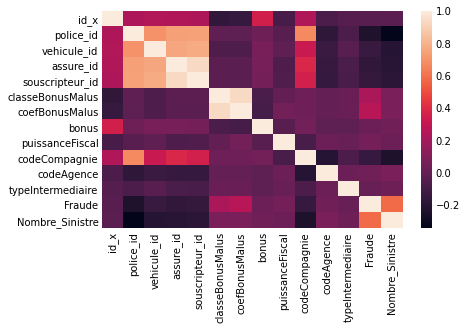

In [0]:
#import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline



# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [0]:
data = df
data2 = data


In [0]:
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols =  df.columns[categorical_feature_mask].tolist()


In [0]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [0]:
# apply le on categorical feature columns
X=df
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].head(10)

DATE_AFFECTATION  date_Calcule  numChassis  numImmatriculation  \
0               845          2500       35139                5357   
1               944          2599       45205                3510   
2               613          2632       53644               50601   
3              1029          2684       84208               49303   
4               667          2687       81087               85068   
5              1240          3421       81087               85068   
6               606          2625       31218               59761   
7               973          2628        3138               60308   
8               643          2663       84024                5518   
9               945          2600       11829               86351   

   typeImmatriculation  energie  dateInsertion  dateAjout  Marque_vehicule  \
0                   11        2            228       2230              161   
1                   11        3            228       2223              154   
2                   11        3            228       2226               26   
3                   11        3            228       2255              212   
4                   11        3            228       2261              212   
5                   11        3            228       2261              212   
6                   11        3            228       2241              161   
7                   11        2            228       2241               55   
8                   11        3            228       2242              212   
9                   11        3            228       2258               79   

   Usage  numPolice  naturePolice  typePolice  dateEffetPolice  
0      9      54597             0           1             5066  
1      9      51115             0           1             3390  
2      9      52461             0           1             4123  
3      9      52210             0           1             4174  
4      9      55276             0           1             5251  
5      9      80915             0           1             7275  
6      9      62852             0           1             6275  
7      9      62858             0           1             6278  
8      9      63252             0           1             6313  
9      9      53711             0           1             4805

In [0]:
X

id_x  police_id  vehicule_id  assure_id  souscripteur_id  \
0        32696      32700        29293      26960            26960   
1        33346      33350        28891      26553            26553   
2        33482      33486        29087      26754            26754   
3        33496      33500        30651      28321            28321   
4        33732      33736        30930      28600            28600   
...        ...        ...          ...        ...              ...   
93137  6196195    2004473        29421     918174           835305   
93138  6961638    1345012       448413     424343           424347   
93139  6968144    1437288      1104617     607879           607885   
93140  7088032    1886160       918128     895549           895559   
93141  6858878    1886166       918198     895627           895637   

       classeBonusMalus  coefBonusMalus  DATE_AFFECTATION  bonus  \
0                     3             100               845      0   
1                     1              80               944      0   
2                     2              90               613      0   
3                     1              80              1029      0   
4                     1              80               667      0   
...                 ...             ...               ...    ...   
93137                 1              80              1015      0   
93138                 4             120              1820      1   
93139                 3             100              1810      1   
93140                 1              80              1862      1   
93141                 6             170              1825      0   

       date_Calcule  numChassis  puissanceFiscal  numImmatriculation  \
0              2500       35139              5.0                5357   
1              2599       45205              6.0                3510   
2              2632       53644              6.0               50601   
3              2684       84208              4.0               49303   
4              2687       81087              4.0               85068   
...             ...         ...              ...                 ...   
93137          3425       49936              7.0               79641   
93138          3428        6929             14.0               27695   
93139          3428        5751             14.0               21976   
93140          3427       72322              6.0               64625   
93141          3428       15346             10.0               11161   

       typeImmatriculation  energie  dateInsertion  dateAjout  \
0                       11        2            228       2230   
1                       11        3            228       2223   
2                       11        3            228       2226   
3                       11        3            228       2255   
4                       11        3            228       2261   
...                    ...      ...            ...        ...   
93137                   11        3            228       2232   
93138                   11        3            228      30082   
93139                   11        3            228      61306   
93140                   11        3            228      47189   
93141                   11        3            228      47196   

       Marque_vehicule  Usage  codeCompagnie  codeAgence  typeIntermediaire  \
0                  161      9              1         702                  0   
1                  154      9              1         640                  1   
2                   26      9              1         681                  0   
3                  212      9              1         725                  0   
4                  212      9              1         628                  0   
...                ...    ...            ...         ...                ...   
93137              154     13             11         168                  0   
93138              204     13              7          56                  

In [0]:
categorical_features = X[categorical_cols] 
categorical_features

DATE_AFFECTATION  date_Calcule  numChassis  numImmatriculation  \
0                   845          2500       35139                5357   
1                   944          2599       45205                3510   
2                   613          2632       53644               50601   
3                  1029          2684       84208               49303   
4                   667          2687       81087               85068   
...                 ...           ...         ...                 ...   
93137              1015          3425       49936               79641   
93138              1820          3428        6929               27695   
93139              1810          3428        5751               21976   
93140              1862          3427       72322               64625   
93141              1825          3428       15346               11161   

       typeImmatriculation  energie  dateInsertion  dateAjout  \
0                       11        2            228       2230   
1                       11        3            228       2223   
2                       11        3            228       2226   
3                       11        3            228       2255   
4                       11        3            228       2261   
...                    ...      ...            ...        ...   
93137                   11        3            228       2232   
93138                   11        3            228      30082   
93139                   11        3            228      61306   
93140                   11        3            228      47189   
93141                   11        3            228      47196   

       Marque_vehicule  Usage  numPolice  naturePolice  typePolice  \
0                  161      9      54597             0           1   
1                  154      9      51115             0           1   
2                   26      9      52461             0           1   
3                  212      9      52210             0           1   
4                  212      9      55276             0           1   
...                ...    ...        ...           ...         ...   
93137              154     13      41391             0           1   
93138              204     13      90369             0           1   
93139              204     13      90491             0           1   
93140              212     13      27269             0           1   
93141              204     13      26776             0           1   

       dateEffetPolice  
0                 5066  
1                 3390  
2                 4123  
3                 4174  
4                 5251  
...                ...  
93137             7050  
93138             6395  
93139             6518  
93140             3919  
93141             3539  

[93142 rows x 14 columns]

In [0]:
data

id_x  police_id  vehicule_id  assure_id  souscripteur_id  \
0        32696      32700        29293      26960            26960   
1        33346      33350        28891      26553            26553   
2        33482      33486        29087      26754            26754   
3        33496      33500        30651      28321            28321   
4        33732      33736        30930      28600            28600   
...        ...        ...          ...        ...              ...   
93137  6196195    2004473        29421     918174           835305   
93138  6961638    1345012       448413     424343           424347   
93139  6968144    1437288      1104617     607879           607885   
93140  7088032    1886160       918128     895549           895559   
93141  6858878    1886166       918198     895627           895637   

       classeBonusMalus  coefBonusMalus  DATE_AFFECTATION  bonus  \
0                     3             100               845      0   
1                     1              80               944      0   
2                     2              90               613      0   
3                     1              80              1029      0   
4                     1              80               667      0   
...                 ...             ...               ...    ...   
93137                 1              80              1015      0   
93138                 4             120              1820      1   
93139                 3             100              1810      1   
93140                 1              80              1862      1   
93141                 6             170              1825      0   

       date_Calcule  numChassis  puissanceFiscal  numImmatriculation  \
0              2500       35139              5.0                5357   
1              2599       45205              6.0                3510   
2              2632       53644              6.0               50601   
3              2684       84208              4.0               49303   
4              2687       81087              4.0               85068   
...             ...         ...              ...                 ...   
93137          3425       49936              7.0               79641   
93138          3428        6929             14.0               27695   
93139          3428        5751             14.0               21976   
93140          3427       72322              6.0               64625   
93141          3428       15346             10.0               11161   

       typeImmatriculation  energie  dateInsertion  dateAjout  \
0                       11        2            228       2230   
1                       11        3            228       2223   
2                       11        3            228       2226   
3                       11        3            228       2255   
4                       11        3            228       2261   
...                    ...      ...            ...        ...   
93137                   11        3            228       2232   
93138                   11        3            228      30082   
93139                   11        3            228      61306   
93140                   11        3            228      47189   
93141                   11        3            228      47196   

       Marque_vehicule  Usage  codeCompagnie  codeAgence  typeIntermediaire  \
0                  161      9              1         702                  0   
1                  154      9              1         640                  1   
2                   26      9              1         681                  0   
3                  212      9              1         725                  0   
4                  212      9              1         628                  0   
...                ...    ...            ...         ...                ...   
93137              154     13             11         168                  0   
93138              204     13              7          56                  

In [0]:
target = X['Fraude']

In [0]:
target.unique()

array([False,  True])

In [0]:

X

id_x  police_id  vehicule_id  assure_id  souscripteur_id  \
0        32696      32700        29293      26960            26960   
1        33346      33350        28891      26553            26553   
2        33482      33486        29087      26754            26754   
3        33496      33500        30651      28321            28321   
4        33732      33736        30930      28600            28600   
...        ...        ...          ...        ...              ...   
93137  6196195    2004473        29421     918174           835305   
93138  6961638    1345012       448413     424343           424347   
93139  6968144    1437288      1104617     607879           607885   
93140  7088032    1886160       918128     895549           895559   
93141  6858878    1886166       918198     895627           895637   

       classeBonusMalus  coefBonusMalus  DATE_AFFECTATION  bonus  \
0                     3             100               845      0   
1                     1              80               944      0   
2                     2              90               613      0   
3                     1              80              1029      0   
4                     1              80               667      0   
...                 ...             ...               ...    ...   
93137                 1              80              1015      0   
93138                 4             120              1820      1   
93139                 3             100              1810      1   
93140                 1              80              1862      1   
93141                 6             170              1825      0   

       date_Calcule  numChassis  puissanceFiscal  numImmatriculation  \
0              2500       35139              5.0                5357   
1              2599       45205              6.0                3510   
2              2632       53644              6.0               50601   
3              2684       84208              4.0               49303   
4              2687       81087              4.0               85068   
...             ...         ...              ...                 ...   
93137          3425       49936              7.0               79641   
93138          3428        6929             14.0               27695   
93139          3428        5751             14.0               21976   
93140          3427       72322              6.0               64625   
93141          3428       15346             10.0               11161   

       typeImmatriculation  energie  dateInsertion  dateAjout  \
0                       11        2            228       2230   
1                       11        3            228       2223   
2                       11        3            228       2226   
3                       11        3            228       2255   
4                       11        3            228       2261   
...                    ...      ...            ...        ...   
93137                   11        3            228       2232   
93138                   11        3            228      30082   
93139                   11        3            228      61306   
93140                   11        3            228      47189   
93141                   11        3            228      47196   

       Marque_vehicule  Usage  codeCompagnie  codeAgence  typeIntermediaire  \
0                  161      9              1         702                  0   
1                  154      9              1         640                  1   
2                   26      9              1         681                  0   
3                  212      9              1         725                  0   
4                  212      9              1         628                  0   
...                ...    ...            ...         ...                ...   
93137              154     13             11         168                  0   
93138              204     13              7          56                  

In [0]:
X.max()

id_x                   7141494.0
police_id              2838847.0
vehicule_id            1720398.0
assure_id              1789421.0
souscripteur_id        1603236.0
classeBonusMalus            11.0
coefBonusMalus             350.0
DATE_AFFECTATION          1869.0
bonus                        1.0
date_Calcule              3428.0
numChassis               92279.0
puissanceFiscal             70.0
numImmatriculation       92479.0
typeImmatriculation         12.0
energie                      3.0
dateInsertion              570.0
dateAjout                74745.0
Marque_vehicule            222.0
Usage                       16.0
codeCompagnie               15.0
codeAgence              104003.0
typeIntermediaire            1.0
numPolice                93141.0
naturePolice                 1.0
typePolice                   1.0
dateEffetPolice           7601.0
Fraude                       1.0
Nombre_Sinistre             12.0
dtype: float64

In [0]:
X

id_x  police_id  vehicule_id  assure_id  souscripteur_id  \
0        32696      32700        29293      26960            26960   
1        33346      33350        28891      26553            26553   
2        33482      33486        29087      26754            26754   
3        33496      33500        30651      28321            28321   
4        33732      33736        30930      28600            28600   
...        ...        ...          ...        ...              ...   
93137  6196195    2004473        29421     918174           835305   
93138  6961638    1345012       448413     424343           424347   
93139  6968144    1437288      1104617     607879           607885   
93140  7088032    1886160       918128     895549           895559   
93141  6858878    1886166       918198     895627           895637   

       classeBonusMalus  coefBonusMalus  DATE_AFFECTATION  bonus  \
0                     3             100               845      0   
1                     1              80               944      0   
2                     2              90               613      0   
3                     1              80              1029      0   
4                     1              80               667      0   
...                 ...             ...               ...    ...   
93137                 1              80              1015      0   
93138                 4             120              1820      1   
93139                 3             100              1810      1   
93140                 1              80              1862      1   
93141                 6             170              1825      0   

       date_Calcule  numChassis  puissanceFiscal  numImmatriculation  \
0              2500       35139              5.0                5357   
1              2599       45205              6.0                3510   
2              2632       53644              6.0               50601   
3              2684       84208              4.0               49303   
4              2687       81087              4.0               85068   
...             ...         ...              ...                 ...   
93137          3425       49936              7.0               79641   
93138          3428        6929             14.0               27695   
93139          3428        5751             14.0               21976   
93140          3427       72322              6.0               64625   
93141          3428       15346             10.0               11161   

       typeImmatriculation  energie  dateInsertion  dateAjout  \
0                       11        2            228       2230   
1                       11        3            228       2223   
2                       11        3            228       2226   
3                       11        3            228       2255   
4                       11        3            228       2261   
...                    ...      ...            ...        ...   
93137                   11        3            228       2232   
93138                   11        3            228      30082   
93139                   11        3            228      61306   
93140                   11        3            228      47189   
93141                   11        3            228      47196   

       Marque_vehicule  Usage  codeCompagnie  codeAgence  typeIntermediaire  \
0                  161      9              1         702                  0   
1                  154      9              1         640                  1   
2                   26      9              1         681                  0   
3                  212      9              1         725                  0   
4                  212      9              1         628                  0   
...                ...    ...            ...         ...                ...   
93137              154     13             11         168                  0   
93138              204     13              7          56                  

In [0]:
X['police_id'] = X['police_id']       /    2838847.0
X['vehicule_id'] = X['vehicule_id']    /         1720398.0
X['assure_id'] = X['assure_id']         /      1789421.0
X['souscripteur_id'] = X['souscripteur_id'] /         1603236.0
X['classeBonusMalus'] =  X['classeBonusMalus'] /            11.0
X['coefBonusMalus'] =  X['coefBonusMalus']      /        350.0
X['DATE_AFFECTATION'] = X['DATE_AFFECTATION']    /       1869.0
X['bonus'] =  X['bonus']                        
X['date_Calcule'] = X['date_Calcule']           /    3428.0
X['numChassis'] =  X['numChassis']             /  92279.0
X['puissanceFiscal'] =X['puissanceFiscal']      /         70.0
X['numImmatriculation'] =  X['numImmatriculation']/       92479.0
X['typeImmatriculation'] = X['typeImmatriculation']/          12.0
X['energie'] =   X['energie']                     /3.0
X['dateInsertion'] = X['dateInsertion']            /   570.0
X['dateAjout'] =   X['dateAjout']              / 74745.0
X['Marque_vehicule'] =X['Marque_vehicule']      /        222.0
X['Usage'] =  X['Usage']                       / 16.0
X['codeCompagnie'] = X['codeCompagnie']         /       15.0
X['codeAgence'] =  X['codeAgence']              /104003.0
X['typeIntermediaire'] =  X['typeIntermediaire']           
X['numPolice'] =   X['numPolice']           /    93141.0
X['dateEffetPolice'] =  X['dateEffetPolice'] /          7601.0
X['Nombre_Sinistre'] =X['Nombre_Sinistre']    /           12.0

In [0]:
X

id_x  police_id  vehicule_id  assure_id  souscripteur_id  \
0        32696   0.011519     0.017027   0.015066         0.016816   
1        33346   0.011748     0.016793   0.014839         0.016562   
2        33482   0.011796     0.016907   0.014951         0.016687   
3        33496   0.011801     0.017816   0.015827         0.017665   
4        33732   0.011884     0.017978   0.015983         0.017839   
...        ...        ...          ...        ...              ...   
93137  6196195   0.706087     0.017101   0.513112         0.521012   
93138  6961638   0.473788     0.260645   0.237140         0.264682   
93139  6968144   0.506293     0.642071   0.339707         0.379161   
93140  7088032   0.664411     0.533672   0.500469         0.558595   
93141  6858878   0.664413     0.533713   0.500512         0.558643   

       classeBonusMalus  coefBonusMalus  DATE_AFFECTATION  bonus  \
0              0.272727        0.285714          0.452113      0   
1              0.090909        0.228571          0.505083      0   
2              0.181818        0.257143          0.327983      0   
3              0.090909        0.228571          0.550562      0   
4              0.090909        0.228571          0.356875      0   
...                 ...             ...               ...    ...   
93137          0.090909        0.228571          0.543071      0   
93138          0.363636        0.342857          0.973783      1   
93139          0.272727        0.285714          0.968432      1   
93140          0.090909        0.228571          0.996255      1   
93141          0.545455        0.485714          0.976458      0   

       date_Calcule  numChassis  puissanceFiscal  numImmatriculation  \
0          0.729288    0.380791         0.071429            0.057927   
1          0.758168    0.489873         0.085714            0.037955   
2          0.767795    0.581324         0.085714            0.547162   
3          0.782964    0.912537         0.057143            0.533126   
4          0.783839    0.878716         0.057143            0.919863   
...             ...         ...              ...                 ...   
93137      0.999125    0.541142         0.100000            0.861179   
93138      1.000000    0.075088         0.200000            0.299473   
93139      1.000000    0.062322         0.200000            0.237632   
93140      0.999708    0.783732         0.085714            0.698807   
93141      1.000000    0.166300         0.142857            0.120687   

       typeImmatriculation   energie  dateInsertion  dateAjout  \
0                 0.916667  0.666667            0.4   0.029835   
1                 0.916667  1.000000            0.4   0.029741   
2                 0.916667  1.000000            0.4   0.029781   
3                 0.916667  1.000000            0.4   0.030169   
4                 0.916667  1.000000            0.4   0.030250   
...                    ...       ...            ...        ...   
93137             0.916667  1.000000            0.4   0.029862   
93138             0.916667  1.000000            0.4   0.402462   
93139             0.916667  1.000000            0.4   0.820202   
93140             0.916667  1.000000            0.4   0.631333   
93141             0.916667  1.000000            0.4   0.631427   

       Marque_vehicule   Usage  codeCompagnie  codeAgence  typeIntermediaire  \
0             0.725225  0.5625       0.066667    0.006750                  0   
1             0.693694  0.5625       0.066667    0.006154                  1   
2             0.117117  0.5625       0.066667    0.006548                  0   
3             0.954955  0.5625       0.066667    0.006971                  0   
4             0.954955  0.5625       0.066667    0.006038                  0   
...                ...     ...            ...         ...                ...   
93137         0.693694  0.8125       0.733333    0.001615                  0   
93138         0.918919  0.8125       0.466667    0.000

#LES Models 

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [0]:
df['Fraude'] = (df['Fraude'] == 'TRUE').astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [0]:
from sklearn.model_selection import train_test_split


all_X = X.drop(['Fraude'], axis=1)
all_y = target

train_X, test_X, train_y, test_y = train_test_split(
   all_X, all_y, test_size=0.2,random_state=0)

In [0]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
np.mean(scores)

0.7734319652936477

In [0]:
lr.fit(train_X, train_y)
predictions_lr = lr.predict(test_X)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score



accuracy = accuracy_score(test_y, predictions_lr)


##knn

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_y)
predictions_knn = knn.predict(test_X)
acc_knn = accuracy_score(test_y, predictions_knn)
acc_knn

0.7868914058725642

##Gradient Descent

In [0]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_X, train_y)
predictions = sgd.predict(test_X)
acc_sgd = accuracy_score(test_y, predictions)
acc_sgd

0.7724515540286649

##CART

In [0]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
predictions_dt = decision_tree.predict(test_X)
acc_decision_tree = accuracy_score(test_y, predictions_dt)
acc_decision_tree

0.8846959042353321

##CART bagging

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import tree
k_fold = KFold(n_splits = 10, shuffle = True, random_state  =0)

In [0]:
tree = tree.DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(tree, all_X, all_y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.88706388 0.89382716 0.88211295 0.88898432 0.89102426 0.89016534
 0.88962852 0.8835087  0.8881254  0.89853983]


In [0]:
import numpy as np
(np.mean(score))
bagging_cart =np.mean(score)
bagging_cart

0.8892980363856994

##Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_y)
predictions_rf = random_forest.predict(test_X)
print(random_forest.score(train_X, train_y))
acc_random_forest = accuracy_score(test_y, predictions_rf)
acc_random_forest

0.9999865795230363


0.9128240914702883

In [0]:

# AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

X = all_X
Y = all_y
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8725602562289426


#RESULTS

In [0]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',
              'Random Forest',  
              'Stochastic Gradient Decent',
              'Decision Tree','AdaBoost','bagging CART'],
    'Score': [accuracy, acc_knn, 
              acc_random_forest, 
              acc_sgd, acc_decision_tree ,results.mean() ,bagging_cart ]})
models.sort_values(by="Score",ascending=False)

Model     Score
2               Random Forest  0.912824
6                bagging CART  0.889298
4               Decision Tree  0.884696
5                    AdaBoost  0.872560
1                         KNN  0.786891
0         Logistic Regression  0.772452
3  Stochastic Gradient Decent  0.772452

on va utiliser le model de Random Forest


